In [1]:
## Importing packages and libraries:

import numpy as np
import scipy
from scipy import stats
from scipy import linalg
from scipy.linalg import eigh
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from IPython.display import clear_output
import glob
import os
import matplotlib.gridspec as gridspec

In [34]:
## OPEN UP CSV FILES AND COMBINE THEM TO GENERATING X INPUTS:
# Defining input_files path to the dataset:
import pandas as pd
PATH = '/Users/Ali/Desktop/Spectra Analysis-ML/Cr-2/'

# Reading the csv data and choosing col_headers as the feature names:
df_combined = pd.DataFrame()
for i in range (1,6):
    result=[]
    if i<10:
        file_name  = "Cr-1000ng_USB2E8911_00" + str(i)
    if 100>i>=10:
        file_name  = "Cr-1000ng_USB2E8911_0" + str(i)
    if i>=100:
        file_name  = "Cr-1000ng_USB2E8911_" + str(i)
    file_name  = file_name + ".txt"
    with open(PATH+file_name) as fp:
        lines = fp.readlines()        
        for x in lines:            
            result.append(x.strip().split("\t")[-1])
    full_df = pd.DataFrame(data=result)
    df_combined = pd.concat([df_combined,full_df], axis=1,sort=False)
    

spectra = df_combined.iloc[15:]
spectra.to_csv('/Users/Ali/Desktop/Spectra Analysis-ML/Cr-2/clean_combined_1000ng.csv', sep='\t')
# print(spectra.shape, spectra.dtypes)
# spectra.head()
del result
del full_df
del df_combined
del spectra

In [35]:
PATH = '/Users/Ali/Desktop/Spectra Analysis-ML/Cr-2/'

# Reading the first concentrations:
spectra_r = pd.read_csv(PATH+'clean_combined_0.1ng.csv', delimiter='\t', header=None)
del spectra_r[0]
spectra_01ng = spectra_r.iloc[1:]
w_int_01ng = spectra_01ng.T.iloc[:,564]
spectra_01ng = spectra_01ng.T.div(w_int_01ng, axis='index')

# Reading the second concentrations:
spectra_r = pd.read_csv(PATH+'clean_combined_1ng.csv', delimiter='\t', header=None)
del spectra_r[0]
spectra_1ng = spectra_r.iloc[1:]
w_int_1ng = spectra_1ng.T.iloc[:,564]
spectra_1ng = spectra_1ng.T.div(w_int_1ng, axis='index')

# Reading the third concentrations:
spectra_r = pd.read_csv(PATH+'clean_combined_10ng.csv', delimiter='\t', header=None)
del spectra_r[0]
spectra_10ng = spectra_r.iloc[1:]
w_int_10ng = spectra_10ng.T.iloc[:,564]
spectra_10ng = spectra_10ng.T.div(w_int_10ng, axis='index')

# Reading the second concentrations:
spectra_r = pd.read_csv(PATH+'clean_combined_100ng.csv', delimiter='\t', header=None)
del spectra_r[0]
spectra_100ng = spectra_r.iloc[1:]
w_int_100ng = spectra_100ng.T.iloc[:,564]
spectra_100ng = spectra_100ng.T.div(w_int_100ng, axis='index')

# Reading the second concentrations:
spectra_r = pd.read_csv(PATH+'clean_combined_1000ng.csv', delimiter='\t', header=None)
del spectra_r[0]
spectra_1000ng = spectra_r.iloc[1:]
w_int_1000ng = spectra_1000ng.T.iloc[:,564]
spectra_1000ng = spectra_1000ng.T.div(w_int_1000ng, axis='index')

spectra_1ng.head()

,1,2,3,4,5,6,7,8,9,10,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
1,0.004327,0.007947,0.007947,0.006137,0.011568,0.005232,0.010663,0.011568,0.019714,0.012473,...,0.015189,0.017904,0.013378,0.019714,0.014283,0.014283,0.014283,0.014283,0.017904,0.015189
2,0.007839,0.013320,0.005098,0.013320,0.017431,0.018802,0.018802,0.020172,0.025654,0.020172,...,0.028394,0.024283,0.014691,0.022913,0.020172,0.025654,0.014691,0.025654,0.022913,0.020172
3,0.008514,0.017407,0.012960,0.026299,0.030745,0.030745,0.039637,0.039637,0.032968,0.030745,...,0.037414,0.035191,0.041860,0.037414,0.035191,0.024076,0.046306,0.030745,0.039637,0.039637
4,0.008001,0.017286,0.014191,0.015739,0.021929,0.026572,0.011096,0.025024,0.025024,0.020382,...,0.029667,0.026572,0.034310,0.029667,0.020382,0.021929,0.026572,0.018834,0.020382,0.028120
5,0.007937,0.009027,0.017748,0.011207,0.016658,0.016658,0.016658,0.017748,0.014478,0.012297,...,0.022109,0.021019,0.017748,0.014478,0.019928,0.018838,0.019928,0.019928,0.023199,0.019928


In [36]:
# Concat concentration DFs:
spectra = pd.concat([spectra_01ng,spectra_1ng,spectra_10ng,spectra_100ng],axis = 0,ignore_index=True)
spectra_01ng_mean = pd.DataFrame(data=spectra_01ng.mean(axis = 0))
spectra_1ng_mean = pd.DataFrame(data=spectra_1ng.mean(axis = 0))
spectra_10ng_mean = pd.DataFrame(data=spectra_10ng.mean(axis = 0))
spectra_100ng_mean = pd.DataFrame(data=spectra_100ng.mean(axis = 0))
print(spectra.shape)
spectra.head(15)

(20, 2047)


,1,2,3,4,5,6,7,8,9,10,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.011676,0.011676,0.007554,0.012707,0.008585,0.017860,0.015799,0.011676,0.010646,0.010646,...,0.011676,0.020952,0.019921,0.018890,0.016829,0.013738,0.015799,0.017860,0.021982,0.019921
1,0.005244,0.006208,0.008135,0.013919,0.010063,0.015847,0.013919,0.016811,0.015847,0.013919,...,0.018738,0.019702,0.019702,0.011991,0.017775,0.016811,0.014883,0.013919,0.019702,0.020666
2,0.005787,0.010082,0.007934,0.014376,0.007934,0.009008,0.014376,0.013303,0.012229,0.018671,...,0.016524,0.018671,0.017597,0.015450,0.024039,0.014376,0.024039,0.013303,0.025113,0.016524
3,0.002974,0.009068,0.012725,0.006631,0.012725,0.017600,0.021257,0.020038,0.015163,0.016381,...,0.016381,0.022476,0.027351,0.024913,0.024913,0.020038,0.016381,0.031008,0.027351,0.021257
4,0.013920,0.011196,0.015282,0.007110,0.015282,0.028901,0.027539,0.019367,0.016644,0.022091,...,0.027539,0.020729,0.027539,0.022091,0.027539,0.027539,0.018006,0.024815,0.023453,0.022091
5,0.004327,0.007947,0.007947,0.006137,0.011568,0.005232,0.010663,0.011568,0.019714,0.012473,...,0.015189,0.017904,0.013378,0.019714,0.014283,0.014283,0.014283,0.014283,0.017904,0.015189
6,0.007839,0.013320,0.005098,0.013320,0.017431,0.018802,0.018802,0.020172,0.025654,0.020172,...,0.028394,0.024283,0.014691,0.022913,0.020172,0.025654,0.014691,0.025654,0.022913,0.020172
7,0.008514,0.017407,0.012960,0.026299,0.030745,0.030745,0.039637,0.039637,0.032968,0.030745,...,0.037414,0.035191,0.041860,0.037414,0.035191,0.024076,0.046306,0.030745,0.039637,0.039637
8,0.008001,0.017286,0.014191,0.015739,0.021929,0.026572,0.011096,0.025024,0.025024,0.020382,...,0.029667,0.026572,0.034310,0.029667,0.020382,0.021929,0.026572,0.018834,0.020382,0.028120
9,0.007937,0.009027,0.017748,0.011207,0.016658,0.016658,0.016658,0.017748,0.014478,0.012297,...,0.022109,0.021019,0.017748,0.014478,0.019928,0.018838,0.019928,0.019928,0.023199,0.019928


In [37]:
# Subtracting the background from the Cr spectra:
PATH = '/Users/Ali/Desktop/Spectra Analysis-ML/EMI Detection/Tungsten Electrode/'
spectra_w = pd.read_csv(PATH+'No_EMI_combined_4.csv', delimiter='\t', header=None)
del spectra_w[0]
spectra_w = spectra_w.iloc[1:]
# scaler = MinMaxScaler()
# spectra_w = scaler.fit_transform(spectra_w)
# spectra_w = pd.DataFrame(spectra_w)
# #spectra = spectra - spectra_w.mean(axis = 0)

In [77]:
# No. of samples for each concentration:
m = 5

# No. of concentrations:
n = 4

# Listing the concentrations:
concentration_org = [0.1,1,10,100]
max_concentration = max(concentration_org)
min_concentration = min(concentration_org)
concentration = [float(i)/max(concentration_org) for i in concentration_org]


# Creating list of concentration:
conc_list = []
for i in range(0,n):
    for j in range (0,m):
        conc_list.append(concentration[i])
        
# Creating the concentration dataframe:
df = pd.DataFrame(data=conc_list, columns = ['Cr_mass(ng)']) 
df.head(m*n)

,Cr_mass(ng)
0,0.001
1,0.001
2,0.001
3,0.001
4,0.001
5,0.010
6,0.010
7,0.010
8,0.010
9,0.010


(200, 800)

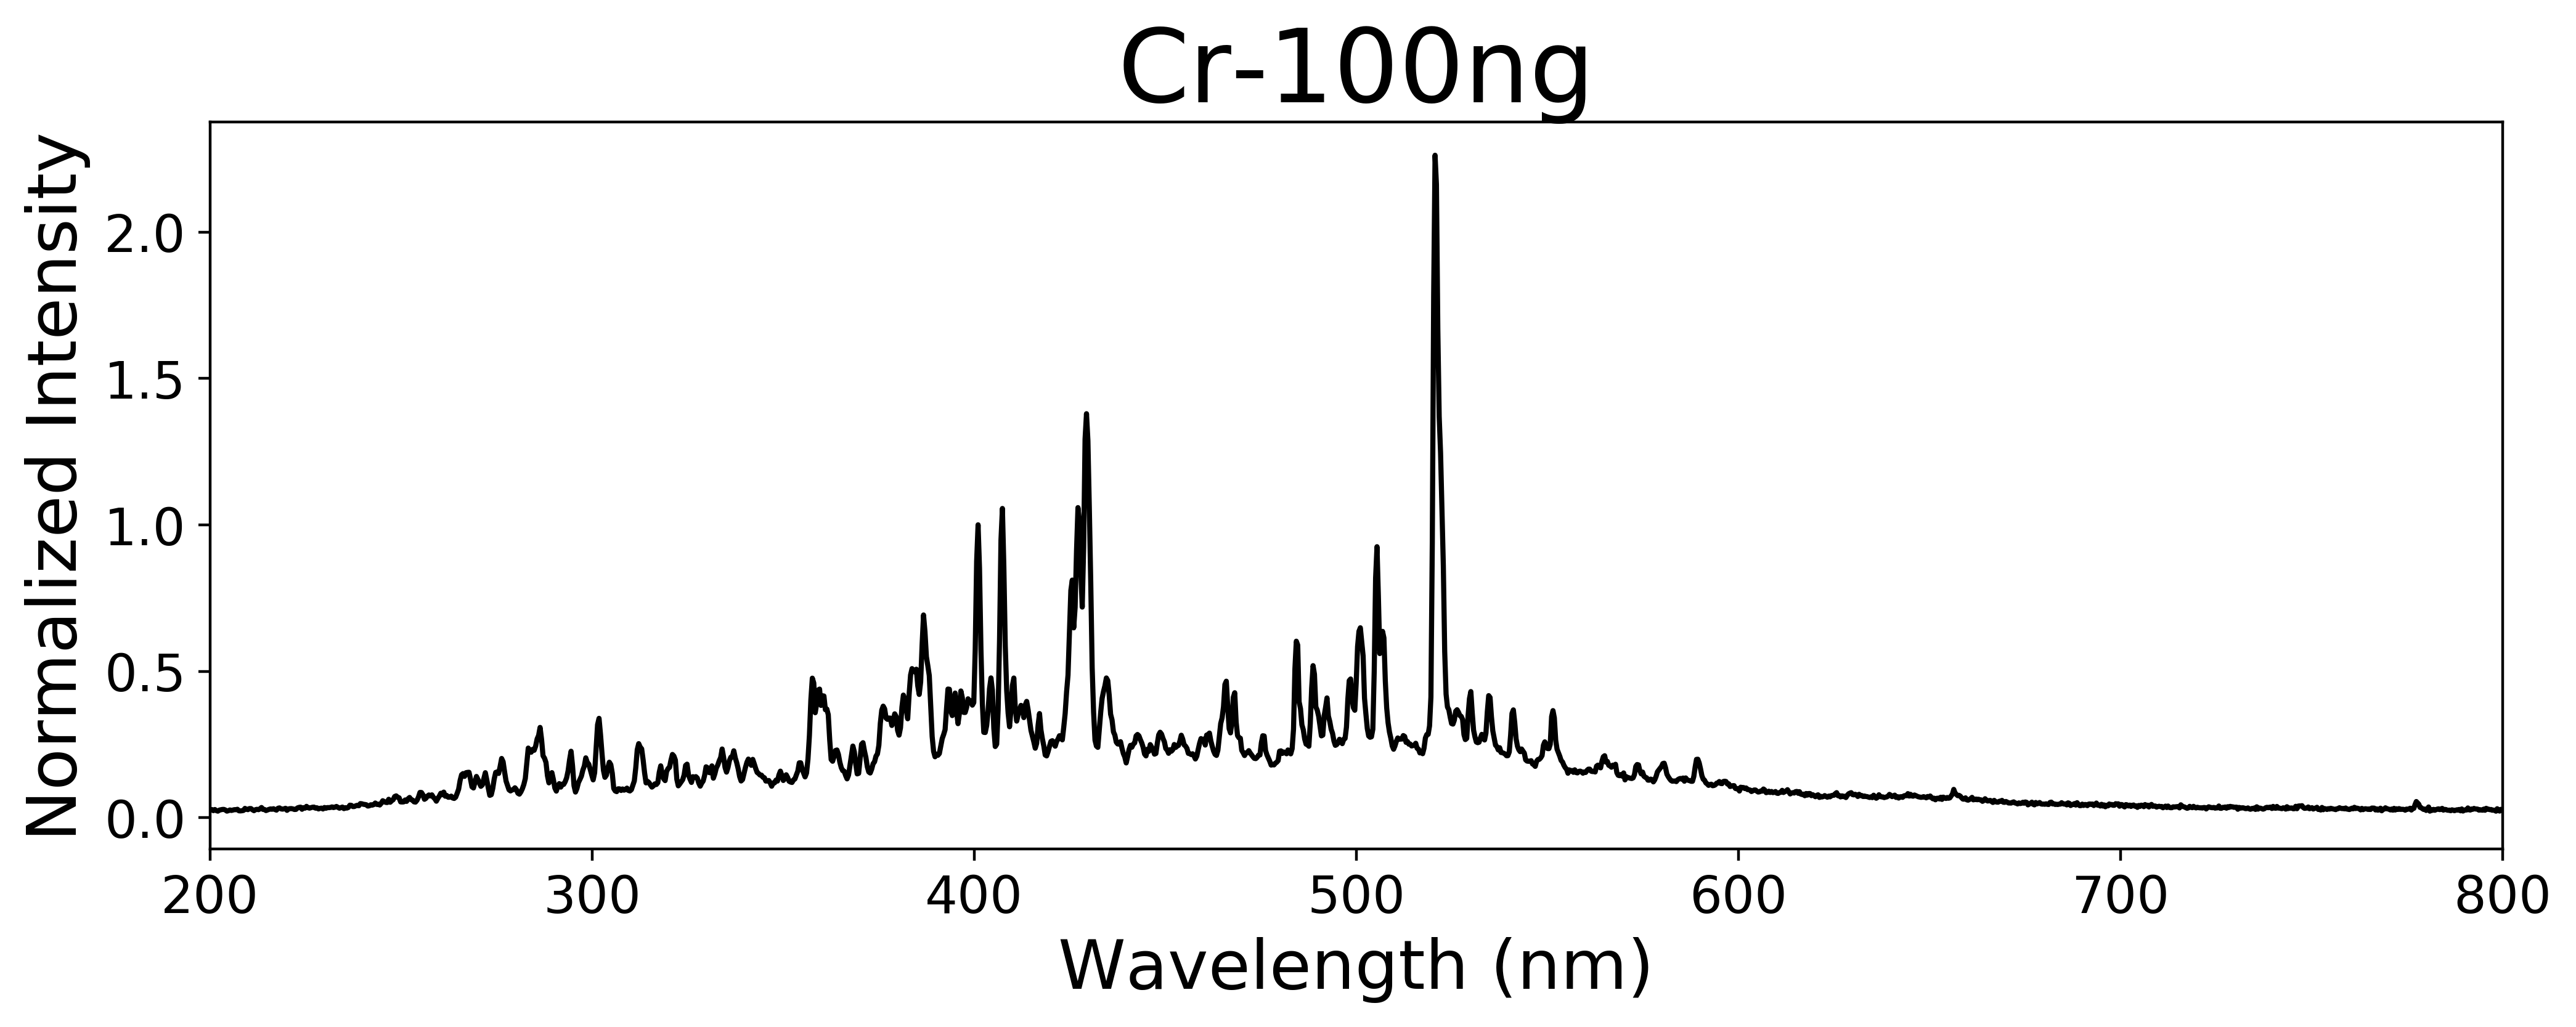

In [78]:
PATH = '/Users/Ali/Desktop/Spectra Analysis-ML/'
wavelength = pd.read_csv(PATH+'Wavelength.csv', delimiter='\t', header=None)
spectra_mean = pd.concat([wavelength,spectra_01ng_mean,spectra_1ng_mean,spectra_10ng_mean,spectra_100ng_mean],axis = 1,ignore_index=True)
spectra_mean = spectra_mean.iloc[1:]
spectra_mean.to_csv('/Users/Ali/Desktop/Spectra Analysis-ML/Cr-2/mean_spectra.csv', sep='\t')
#spectra_mean.iloc[:,0].shape
#concentration_org.shape
#spectra_mean.iloc[:,1:].shape
#spectra_mean.head()
#fig, axes = plt.subplots(1, 1,figsize=(20,10))
# plt.plot(wavelength,spectra_1ng.mean(axis = 0), linestyle='-')  # solid
# plt.plot(wavelength,spectra_10ng.mean(axis = 0), linestyle='-')  # solid
#plt.plot(wavelength,spectra_1000ng.mean(axis = 0)-spectra_w.mean(axis = 0), linestyle='-')  # solid


gridspec.GridSpec(9,2)
figure(num=None, figsize=(12, 9), dpi=400, facecolor='w', edgecolor='k')
plt.subplot2grid((9,2), (0,0),colspan=2, rowspan=4)
plt.plot(wavelength, spectra_100ng.mean(axis = 0),  color='black')
plt.xlabel('Wavelength (nm)',fontsize=20)
plt.ylabel('Normalized Intensity',fontsize=20)
plt.title('Cr-100ng',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(200,800)


In [32]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# spectra = scaler.fit_transform(spectra)
# spectra = pd.DataFrame(spectra)
# print(spectra.shape)
#spectra.head(15)

# avg = []
# for i in range(0, spectra.shape[0], m):
#     r = spectra[i:i+m].mean(axis=0)
#     avg.append(r)
# avg = np.asarray(avg)
# spectra_scaled = pd.DataFrame(data=avg)
# print(spectra_scaled.shape)
# spectra_scaled.head(5)
# gridspec.GridSpec(9,2)
# figure(num=None, figsize=(12, 9), dpi=400, facecolor='w', edgecolor='k')
# plt.subplot2grid((9,2), (0,0),colspan=2, rowspan=4)
# plt.plot(wavelength, avg[3],  color='black')
# plt.xlabel('Wavelength (nm)',fontsize=20)
# plt.ylabel('Normalized Intensity',fontsize=20)
# plt.title('Cr-100ng',fontsize=30)
# plt.tick_params(axis='both', which='major', labelsize=15)
# plt.xlim(200,800)

(20, 2047)
(4, 2047)


,0,1,2,3,4,5,6,7,8,9,...,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046
0,0.459581,0.511665,0.257506,0.158087,0.121779,0.230679,0.332594,0.238832,0.263730,0.375668,...,0.213864,0.318233,0.329467,0.171830,0.341179,0.218285,0.175768,0.228133,0.322297,0.231612
1,0.413768,0.722557,0.298298,0.245483,0.423607,0.260048,0.350220,0.429931,0.576590,0.481318,...,0.394135,0.427102,0.370463,0.277628,0.336081,0.267147,0.300953,0.263189,0.345655,0.316782
2,0.220981,0.264189,0.172640,0.086795,0.118981,0.118639,0.196785,0.069787,0.215006,0.272378,...,0.149372,0.171827,0.161081,0.113006,0.153368,0.132715,0.101831,0.112517,0.198567,0.142761
3,0.321466,0.382934,0.333338,0.282205,0.298774,0.268884,0.343486,0.308249,0.422819,0.427490,...,0.314790,0.372639,0.346078,0.293969,0.322105,0.298013,0.318402,0.295432,0.332660,0.353995


c =  0.0001 : mean_squared_error= 0.03979312479087253 &&& No. of Coeff.= 16
c =  0.0006210526315789474 : mean_squared_error= 0.049530378848491784 &&& No. of Coeff.= 11
c =  0.0011421052631578948 : mean_squared_error= 0.04946592465425061 &&& No. of Coeff.= 10
c =  0.0016631578947368423 : mean_squared_error= 0.049230771754409784 &&& No. of Coeff.= 7
c =  0.0021842105263157894 : mean_squared_error= 0.05044539715007192 &&& No. of Coeff.= 6
c =  0.0027052631578947366 : mean_squared_error= 0.05435601779003492 &&& No. of Coeff.= 5
c =  0.0032263157894736843 : mean_squared_error= 0.05860241467977305 &&& No. of Coeff.= 5
c =  0.0037473684210526316 : mean_squared_error= 0.06139511490899332 &&& No. of Coeff.= 3
c =  0.004268421052631579 : mean_squared_error= 0.06350452121403379 &&& No. of Coeff.= 3
c =  0.004789473684210527 : mean_squared_error= 0.06656893073544676 &&& No. of Coeff.= 4
c =  0.005310526315789474 : mean_squared_error= 0.07047856129164709 &&& No. of Coeff.= 4
c =  0.0058315789473684

(0, 0.011)

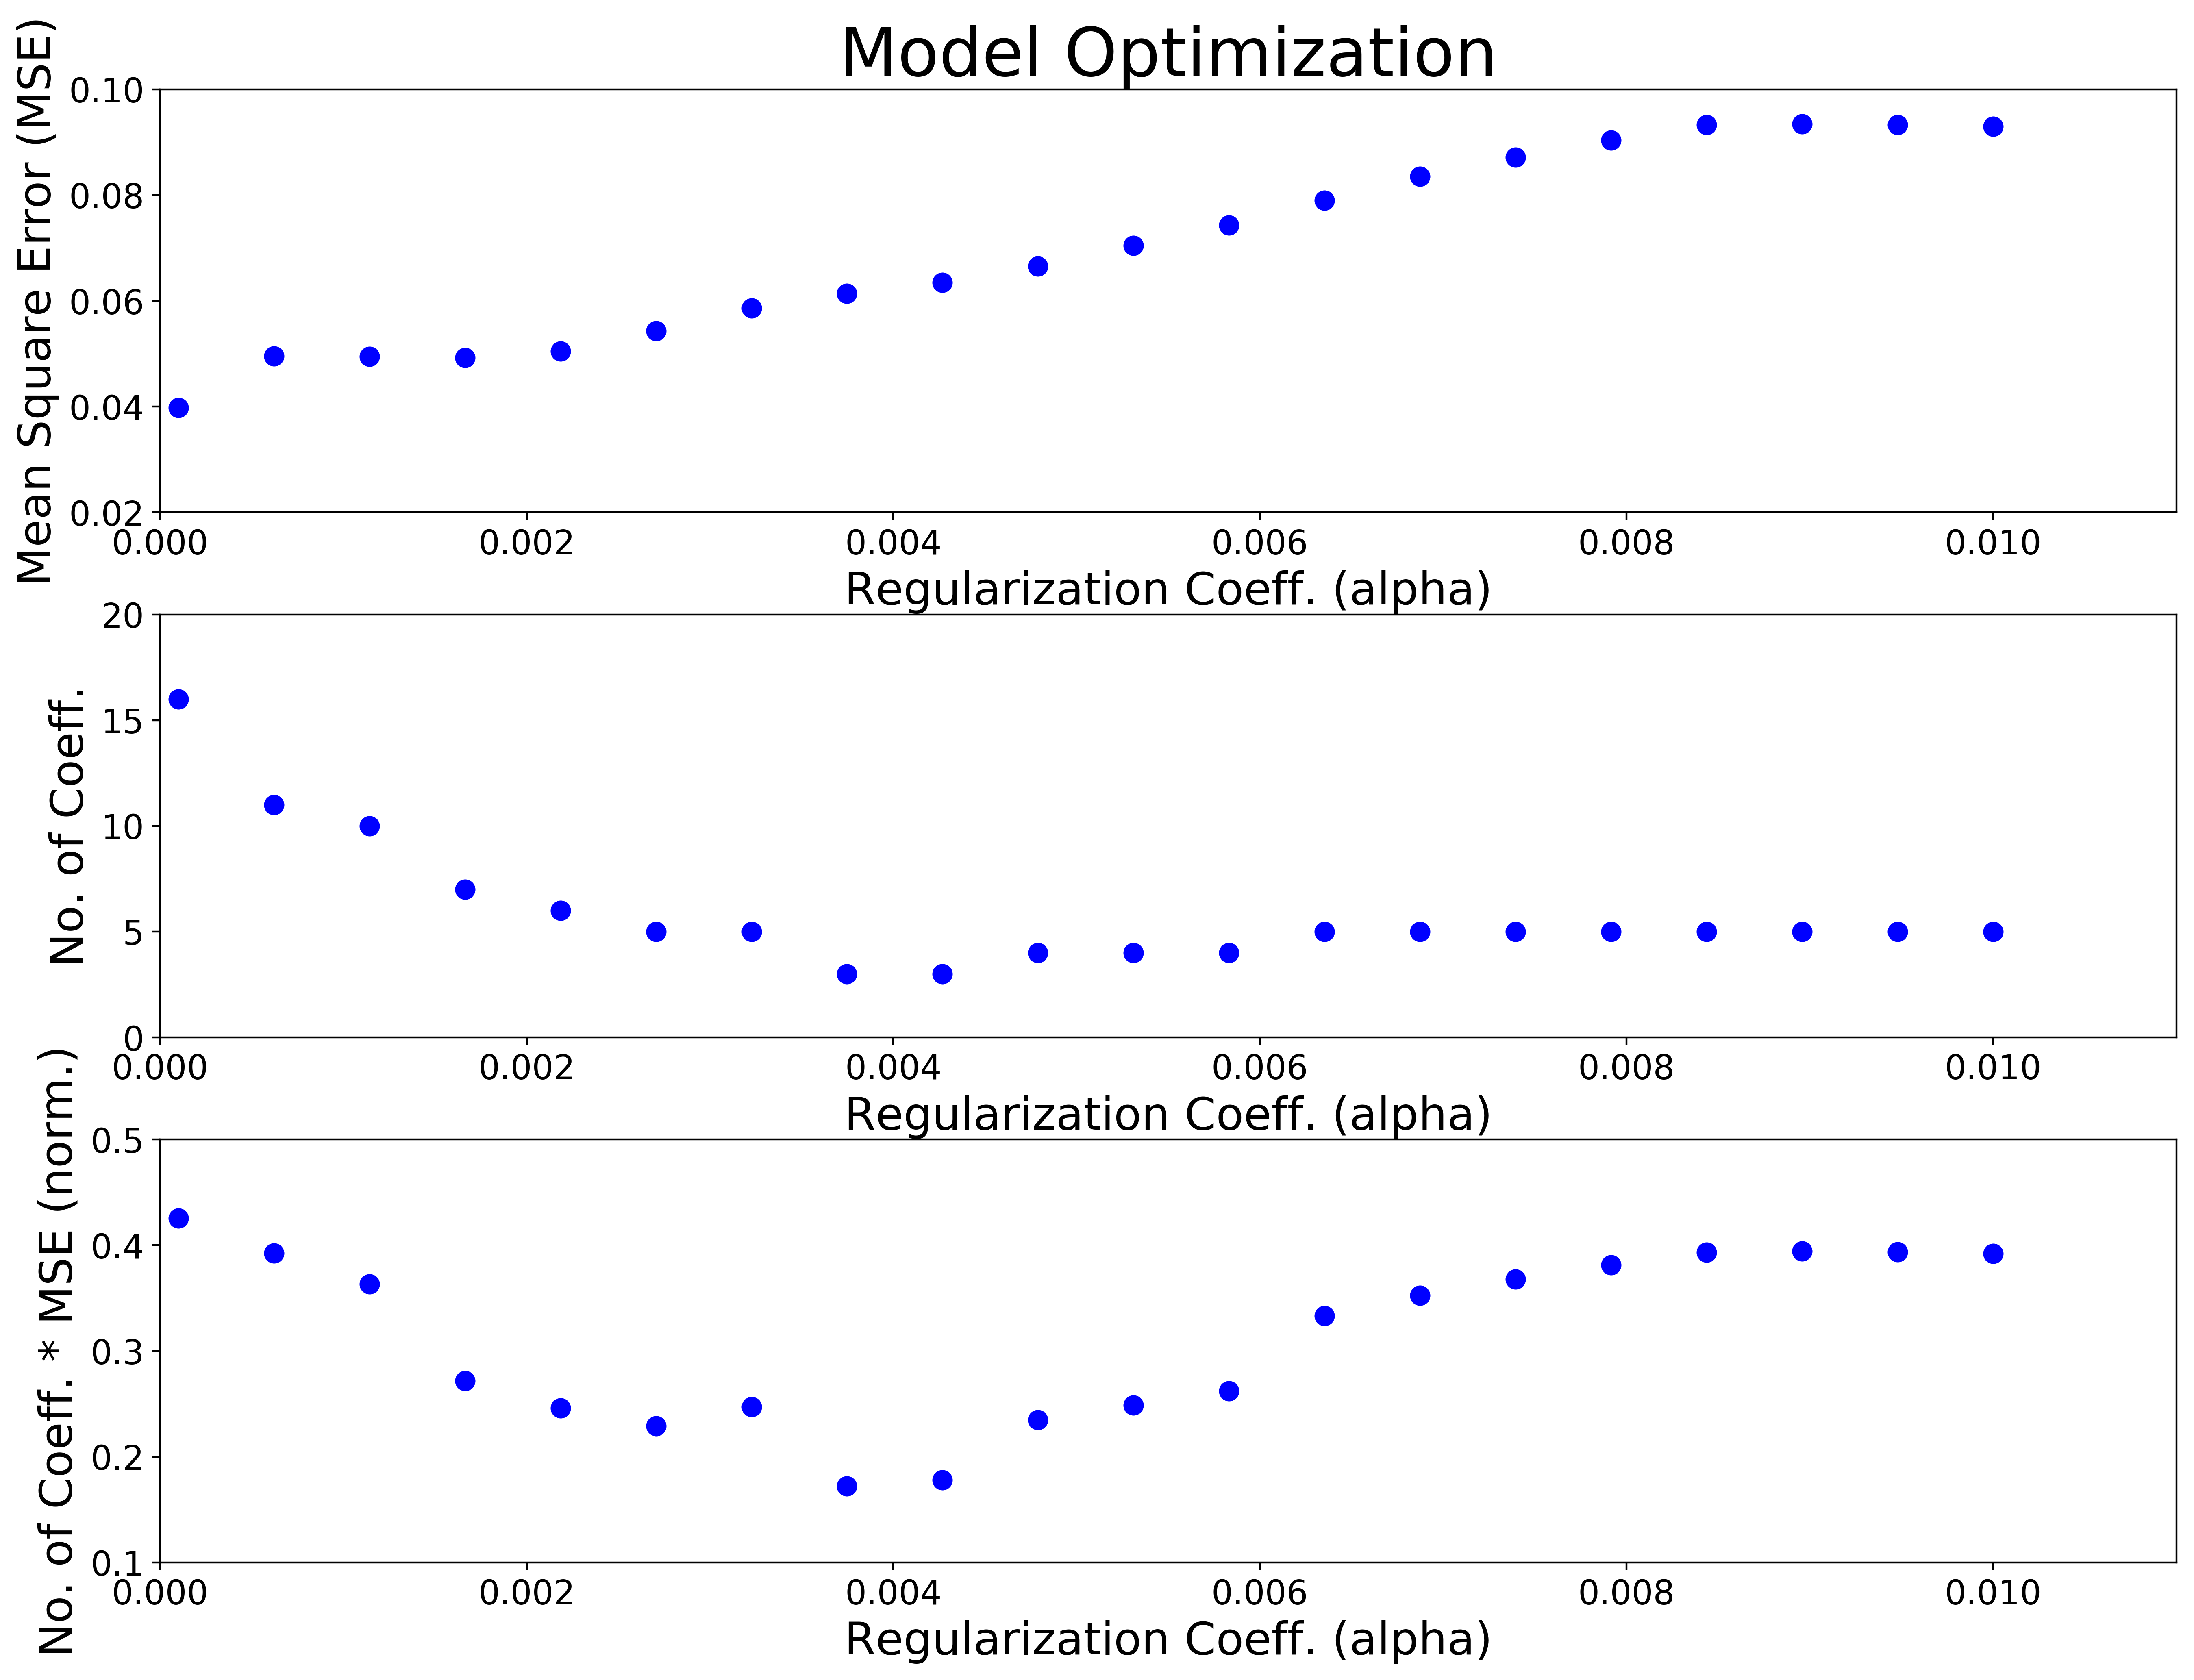

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error,r2_score
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error

MSE = []
result_k = []
for c in np.linspace(0.0001,0.01,20):
    result = []
    for i in range(0,m*n):
        drop_list = [i]    
        X_train = spectra.copy()
        X_train.drop(drop_list,axis = 0, inplace=True)
        y_train = df.copy()
        y_train.drop(drop_list,axis = 0, inplace=True)
        X_test = spectra.iloc[drop_list]
        y_test = df.iloc[drop_list]
        alpha = c
        model = linear_model.Lasso(alpha,max_iter=10000)
        model.fit(X_train,y_train)
        predicted_concentration = model.predict(X_test)
        result.append(predicted_concentration[0])
    result_k.append(np.count_nonzero(model.coef_.T))
    MSE.append(mean_squared_error(result, conc_list))
    print('c = ', c, ': mean_squared_error=',mean_squared_error(result, conc_list),
          '&&& No. of Coeff.=',np.count_nonzero(model.coef_.T))

# Plotting:
gridspec.GridSpec(17,2)
figure(num=None, figsize=(16, 12), dpi=400, facecolor='w', edgecolor='k')

# Plot No. 1:
plt.subplot2grid((17,2), (0,0),colspan=2, rowspan=5)
plt.xlabel('Regularization Coeff. (alpha)',fontsize=20)
plt.ylabel('Mean Square Error (MSE)',fontsize=20)
plt.title('Model Optimization',fontsize=30)
plt.scatter(np.linspace(0.0001,0.01,20), MSE, color='blue', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0.02,0.1)
plt.xlim(0,0.011)

# Plot No. 2:
plt.subplot2grid((17,2), (6,0),colspan=2, rowspan=5)
plt.xlabel('Regularization Coeff. (alpha)',fontsize=20)
plt.ylabel('No. of Coeff.',fontsize=20)
plt.scatter(np.linspace(0.0001,0.01,20),result_k , color='blue', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,20)
plt.xlim(0,0.011)

# Plot No. 3:
plt.subplot2grid((17,2), (12,0),colspan=2, rowspan=5)
plt.xlabel('Regularization Coeff. (alpha)',fontsize=20)
plt.ylabel('No. of Coeff. * MSE (norm.)',fontsize=20)
result_k_norm = [float(i)/max(result_k) for i in result_k]
MSE_norm = [float(i)/max(MSE) for i in MSE]
plt.scatter(np.linspace(0.0001,0.01,20), [a**(0.8)*b for a,b in zip(result_k_norm,MSE_norm)], color='blue', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0.1,0.5)
plt.xlim(0,0.011)

In [14]:
from sklearn.model_selection import GridSearchCV,LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

X = spectra.copy()
y = df.copy()
my_cv = LeaveOneOut()
alphas = np.linspace(0.0001,0.001,10)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv = my_cv,scoring='neg_mean_squared_error')
grid_result = grid.fit(X, y)
print(grid.best_estimator_.alpha)

0.0001


predic_conc[ 1 ]= [0.0176 0.0385]
predic_conc[ 2 ]= [0.0896 0.0773 0.1759 0.0406]
predic_conc[ 3 ]= [0.1847 0.1371 0.182  0.1497 0.2215]
predic_conc[ 4 ]= [1.0692 0.156  1.5609 0.8225 0.7115]
MSE= 0.008054941258988143
Actual Mass [0.1, 1, 10, 100]
Average Prediction [2.803, 9.588, 17.498, 86.401]
STDEV Prediction [1.477, 5.728, 3.309, 51.333]
STDERROR Prediction [1.045, 2.864, 1.48, 22.957]
Margin of Error =  [2.0482, 5.61344, 2.9008, 44.99572]


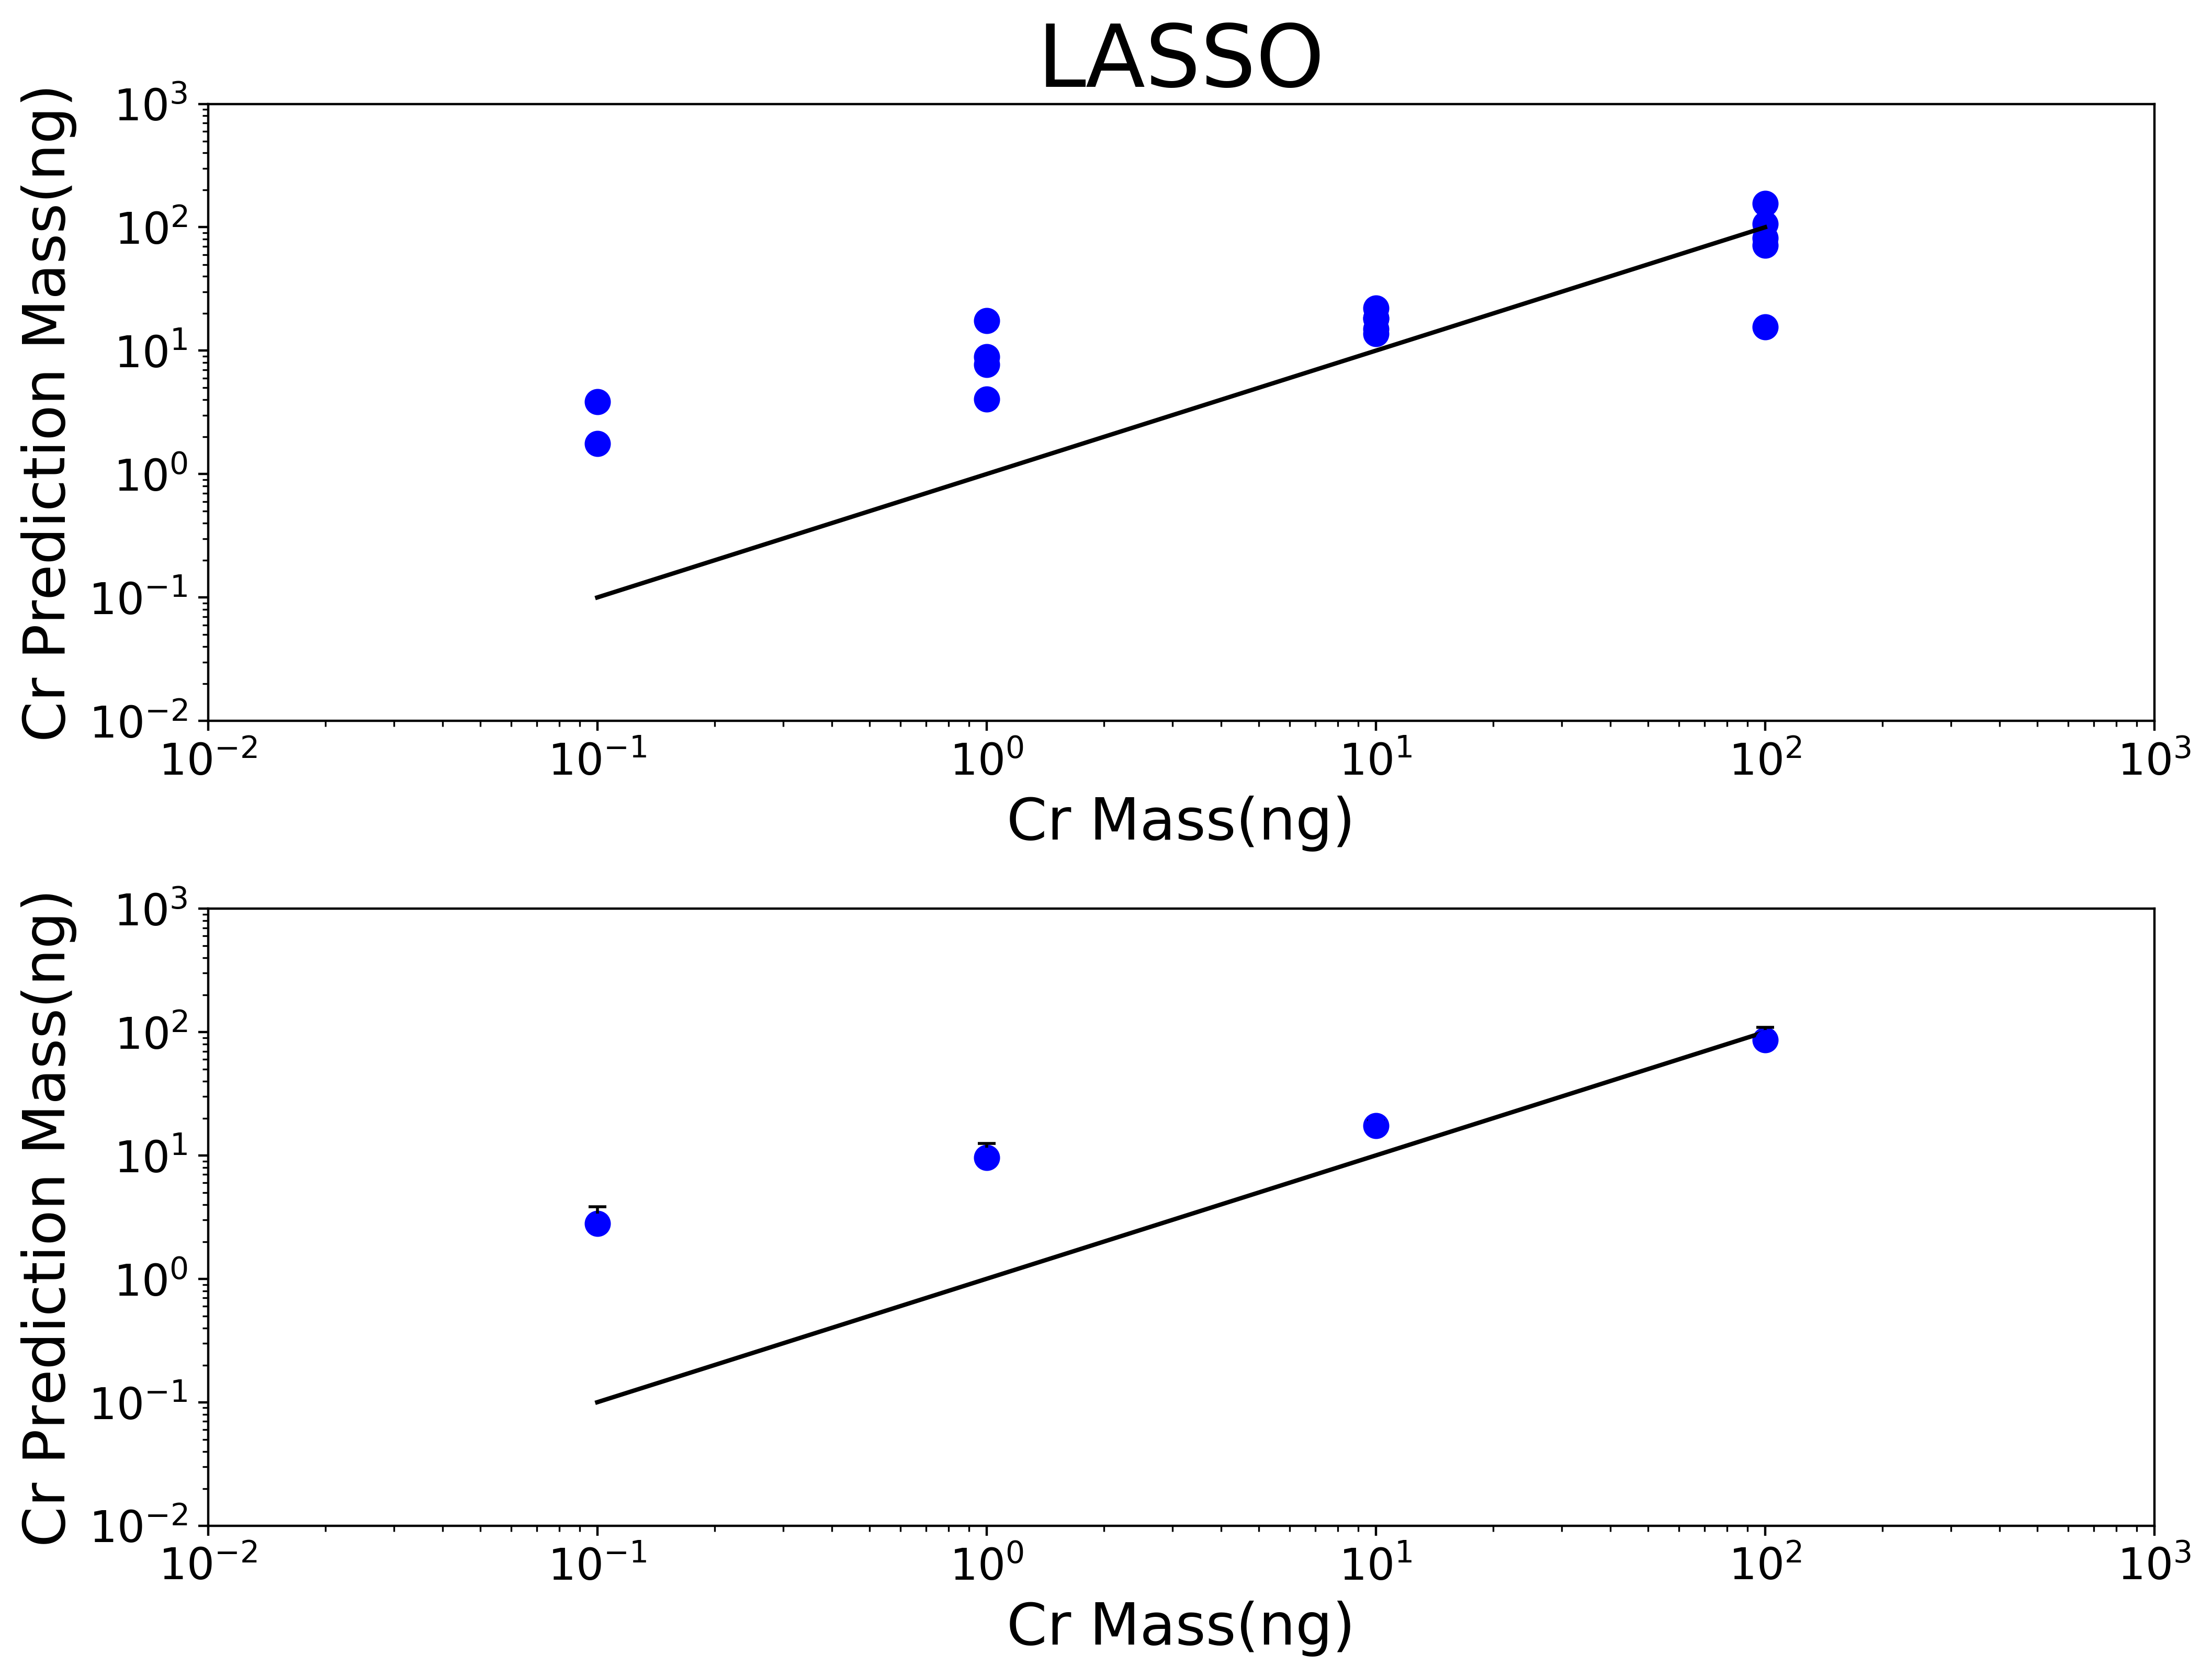

In [133]:
from sklearn.model_selection import GridSearchCV,LeaveOneOut, cross_val_score, cross_val_predict
import statistics 
np.set_printoptions(precision=4)

my_cv = LeaveOneOut()
X = spectra.copy()
y = df.copy()
#alpha = 0.004
#alpha = 0.004268421052631579
alpha = 0.0037
#model = Ridge(alpha)
model = linear_model.Lasso(alpha,max_iter=10000)
predictions = cross_val_predict(model, X, y, cv=my_cv)

# Extracting the predictions for each concentrtion into a separate list:
p = n+1
final = [predictions[i * p:(i + 1) * p] for i in range((len(predictions) + p - 1) // p )]  
predic_conc = [[]]
for i in range (0,m-1):
    x = np.array(final[i])
    x = x[x >=0]
    predic_conc.append(x)

for i in range (1,m):
    print('predic_conc[',i,']=',predic_conc[i])

# Calculating the average and STDEV for Non-Negative Values:
averages = []
std = []
s_e = []
for i in range (1,m):
    averages.append(statistics.mean(predic_conc[i]))
    std.append(statistics.stdev(predic_conc[i]))
    s_e.append(statistics.stdev(predic_conc[i])/(len(predic_conc[i]))**(0.5))

print('MSE=',mean_squared_error(averages, concentration))
# Converting from normalized results to actual results:
averages = [x * max_concentration for x in averages]
std = [x * max_concentration for x in std]
s_e = [x * max_concentration for x in s_e]

# Printing Results:
print('Actual Mass', concentration_org)
print_average =  [round(x,3) for x in averages] 
print('Average Prediction',print_average)
print_std =  [round(x,3) for x in std] 
print('STDEV Prediction', print_std)
print_s_e =  [round(x,3) for x in s_e] 
print('STDERROR Prediction', print_s_e)
print('Margin of Error = ',[i * 1.96 for i in print_s_e])

# Plotting:
gridspec.GridSpec(9,2)
figure(num=None, figsize=(12, 9), dpi=400, facecolor='w', edgecolor='k')

# Plot No. 1:
plt.subplot2grid((9,2), (0,0),colspan=2, rowspan=4)
plt.xlabel('Cr Mass(ng)',fontsize=20)
plt.ylabel('Cr Prediction Mass(ng)',fontsize=20)
plt.title('LASSO',fontsize=30)
plt.plot(concentration_org, concentration_org,  color='black')
plt.scatter(y*max_concentration, predictions*max_concentration, color='blue', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yscale('log') 
plt.xscale('log')
plt.ylim(min_concentration*0.1,max_concentration*10)
plt.xlim(min_concentration*0.1,max_concentration*10)

# Plot No. 2:
plt.subplot2grid((9,2), (5,0),colspan=2, rowspan=4)
plt.plot(concentration_org, concentration_org,  color='black')
plt.scatter(concentration_org, averages,color='blue', linewidth=3)
plt.xlabel('Cr Mass(ng)',fontsize=20)
plt.ylabel('Cr Prediction Mass(ng)',fontsize=20)
plotline, cap, barlinecols = plt.errorbar(concentration_org, averages, yerr=s_e, fmt='o', color='blue',
                                          ecolor='black', elinewidth=1,capsize=3,lolims=True)
cap[0].set_marker('_')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(min_concentration*0.1,max_concentration*10)
plt.xlim(min_concentration*0.1,max_concentration*10)
plt.xscale('log')
plt.yscale('log')
#fig.subplots_adjust(wspace=20)

In [134]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

averages_copy = averages.copy()
concentration_copy = concentration.copy()
averages_copy = [x / max_concentration for x in averages_copy]
avg_pred = np.array(averages_copy)
concentration_arr = np.array(concentration_copy)
print('avg_pred=',avg_pred)
print('concentration_arr=',concentration_arr)

## OLS Stats:
# concentration_arr = sm.add_constant(concentration_arr)
# ols_model = sm.OLS(avg_pred,concentration_arr)
# ols_results = ols_model.fit()
# ols_results.params
# ols_results.summary()

## Linear Regression:
lr = linear_model.LinearRegression()
lr.fit(concentration_arr.reshape(-1, 1),avg_pred.reshape(-1, 1))
r2_score(concentration_arr, avg_pred)
print('slope=',lr.coef_[0,0])  
print('intercept=',lr.intercept_[0] )
print('R2=',r2_score(concentration_arr, avg_pred))


SB = (np.mean(avg_pred)-np.mean(concentration_arr))**2
NU = ((1-lr.coef_[0,0])*(np.std(concentration_arr)))**2
LC = (1-r2_score(concentration_arr, avg_pred))*(np.std(avg_pred))**2
print('SB=',round(100*SB/(SB+NU+LC),2),'%')
print('NU=',round(100*NU/(SB+NU+LC),2),'%')
print('LC=',round(100*LC/(SB+NU+LC),2),'%')


avg_pred= [0.028  0.0959 0.175  0.864 ]
concentration_arr= [0.001 0.01  0.1   1.   ]
slope= 0.7975565343682842
intercept= 0.06920534702687597
R2= 0.9540715438054361
SB= 1.35 %
NU= 57.45 %
LC= 41.21 %


LOD =  25.491150162660208 ng
No. of nonzero coefficients, k =  4


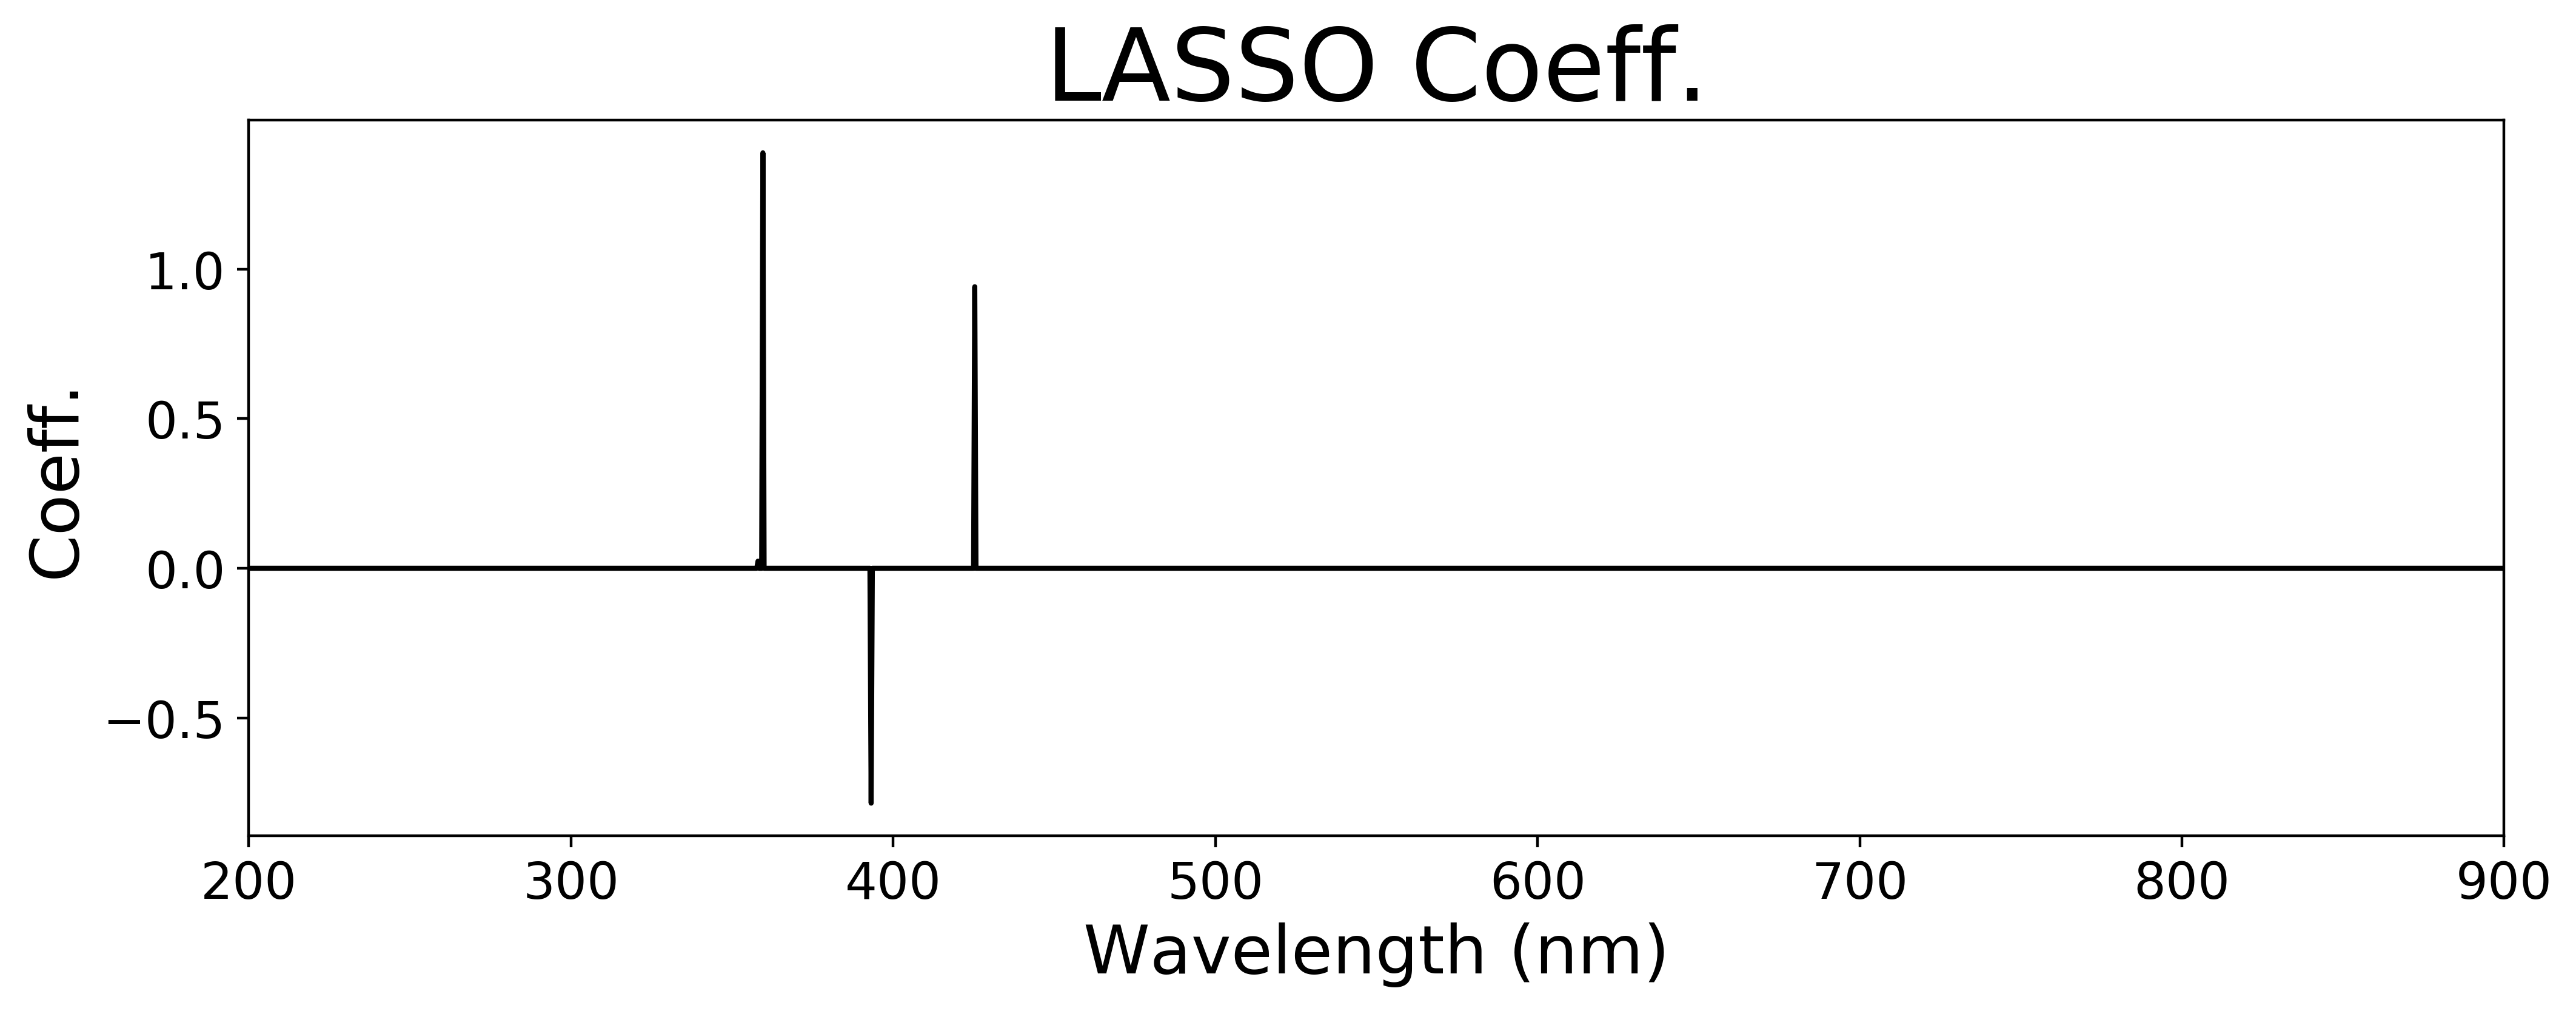

In [135]:
# Model Fitting:
X = spectra.copy()
y = df.copy()
#alpha = 0.0003
alpha = 0.0037
model = linear_model.Lasso(alpha,max_iter=5000)
model.fit(X,y)

# Plotting:
gridspec.GridSpec(9,2)
figure(num=None, figsize=(12, 9), dpi=400, facecolor='w', edgecolor='k')
plt.subplot2grid((9,2), (5,0),colspan=2, rowspan=4)
plt.plot(wavelength, model.coef_.T,  color='black')
plt.xlabel('Wavelength (nm)',fontsize=20)
plt.ylabel('Coeff.',fontsize=20)
plt.title('LASSO Coeff.',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(200,900)
print('LOD = ',3*0.045869682*np.linalg.norm(model.coef_.T)*max_concentration, 'ng')
#fig.subplots_adjust(wspace=20)

# Print No. of nonzero coefficients:
print('No. of nonzero coefficients, k = ',np.count_nonzero(model.coef_.T))
# Saving the model coefficients:
# PATH = '/Users/Ali/Desktop/Spectra Analysis-ML/Cr-2/'
# model_coeff = pd.DataFrame(data=model.coef_.T)
# model_coeff.to_csv('/Users/Ali/Desktop/Spectra Analysis-ML/Cr-2/LASSO Coeff.csv', sep='\t')

In [18]:
result_w = []
blank_concentration = model.predict(spectra_w)
print('predicted_concentration_blank = ',blank_concentration.mean())

predicted_concentration_blank =  0.23158580034044193


c =  1 & mean_squared_error= 0.15388942196294722
c =  2 & mean_squared_error= 0.08324343082486621
c =  3 & mean_squared_error= 0.09836671128765061
c =  4 & mean_squared_error= 0.05616256202786919
c =  5 & mean_squared_error= 0.05829986759762897
c =  6 & mean_squared_error= 0.07041088862005453
c =  7 & mean_squared_error= 0.07279088191636036
c =  8 & mean_squared_error= 0.07374976801018843
c =  9 & mean_squared_error= 0.07515102760244607
c =  10 & mean_squared_error= 0.075245881768546
c =  11 & mean_squared_error= 0.07521838893386903
c =  12 & mean_squared_error= 0.07521514204914527
c =  13 & mean_squared_error= 0.07521621933585904
c =  14 & mean_squared_error= 0.07521554832117389
c =  15 & mean_squared_error= 0.07521574556643493
c =  16 & mean_squared_error= 0.07521581528686498
c =  17 & mean_squared_error= 0.07521581415055364


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  18 & mean_squared_error= 0.07521581465799256


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  19 & mean_squared_error= 0.07521581465799256


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  20 & mean_squared_error= 0.07521581465799257


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  21 & mean_squared_error= 0.07521581465799257


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  22 & mean_squared_error= 0.07521581465799246


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  23 & mean_squared_error= 0.07521581465799246


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  24 & mean_squared_error= 0.07521581465799268


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  25 & mean_squared_error= 0.07521581465799268


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  26 & mean_squared_error= 0.07521581465799242


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  27 & mean_squared_error= 0.07521581465799242


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  28 & mean_squared_error= 0.07521581465799258


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  29 & mean_squared_error= 0.07521581465799258


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  30 & mean_squared_error= 0.07521581465799258


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  31 & mean_squared_error= 0.07521581465799258


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  32 & mean_squared_error= 0.07521581465799258


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  33 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  34 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  35 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  36 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  37 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  38 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  39 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  40 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  41 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  42 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  43 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  44 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  45 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  46 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  47 & mean_squared_error= 0.07521581465799247


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  48 & mean_squared_error= 0.07521581465799249


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  49 & mean_squared_error= 0.07521581465799249


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

c =  50 & mean_squared_error= 0.07521581465799249


/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
/Users/Ali

(0, 51)

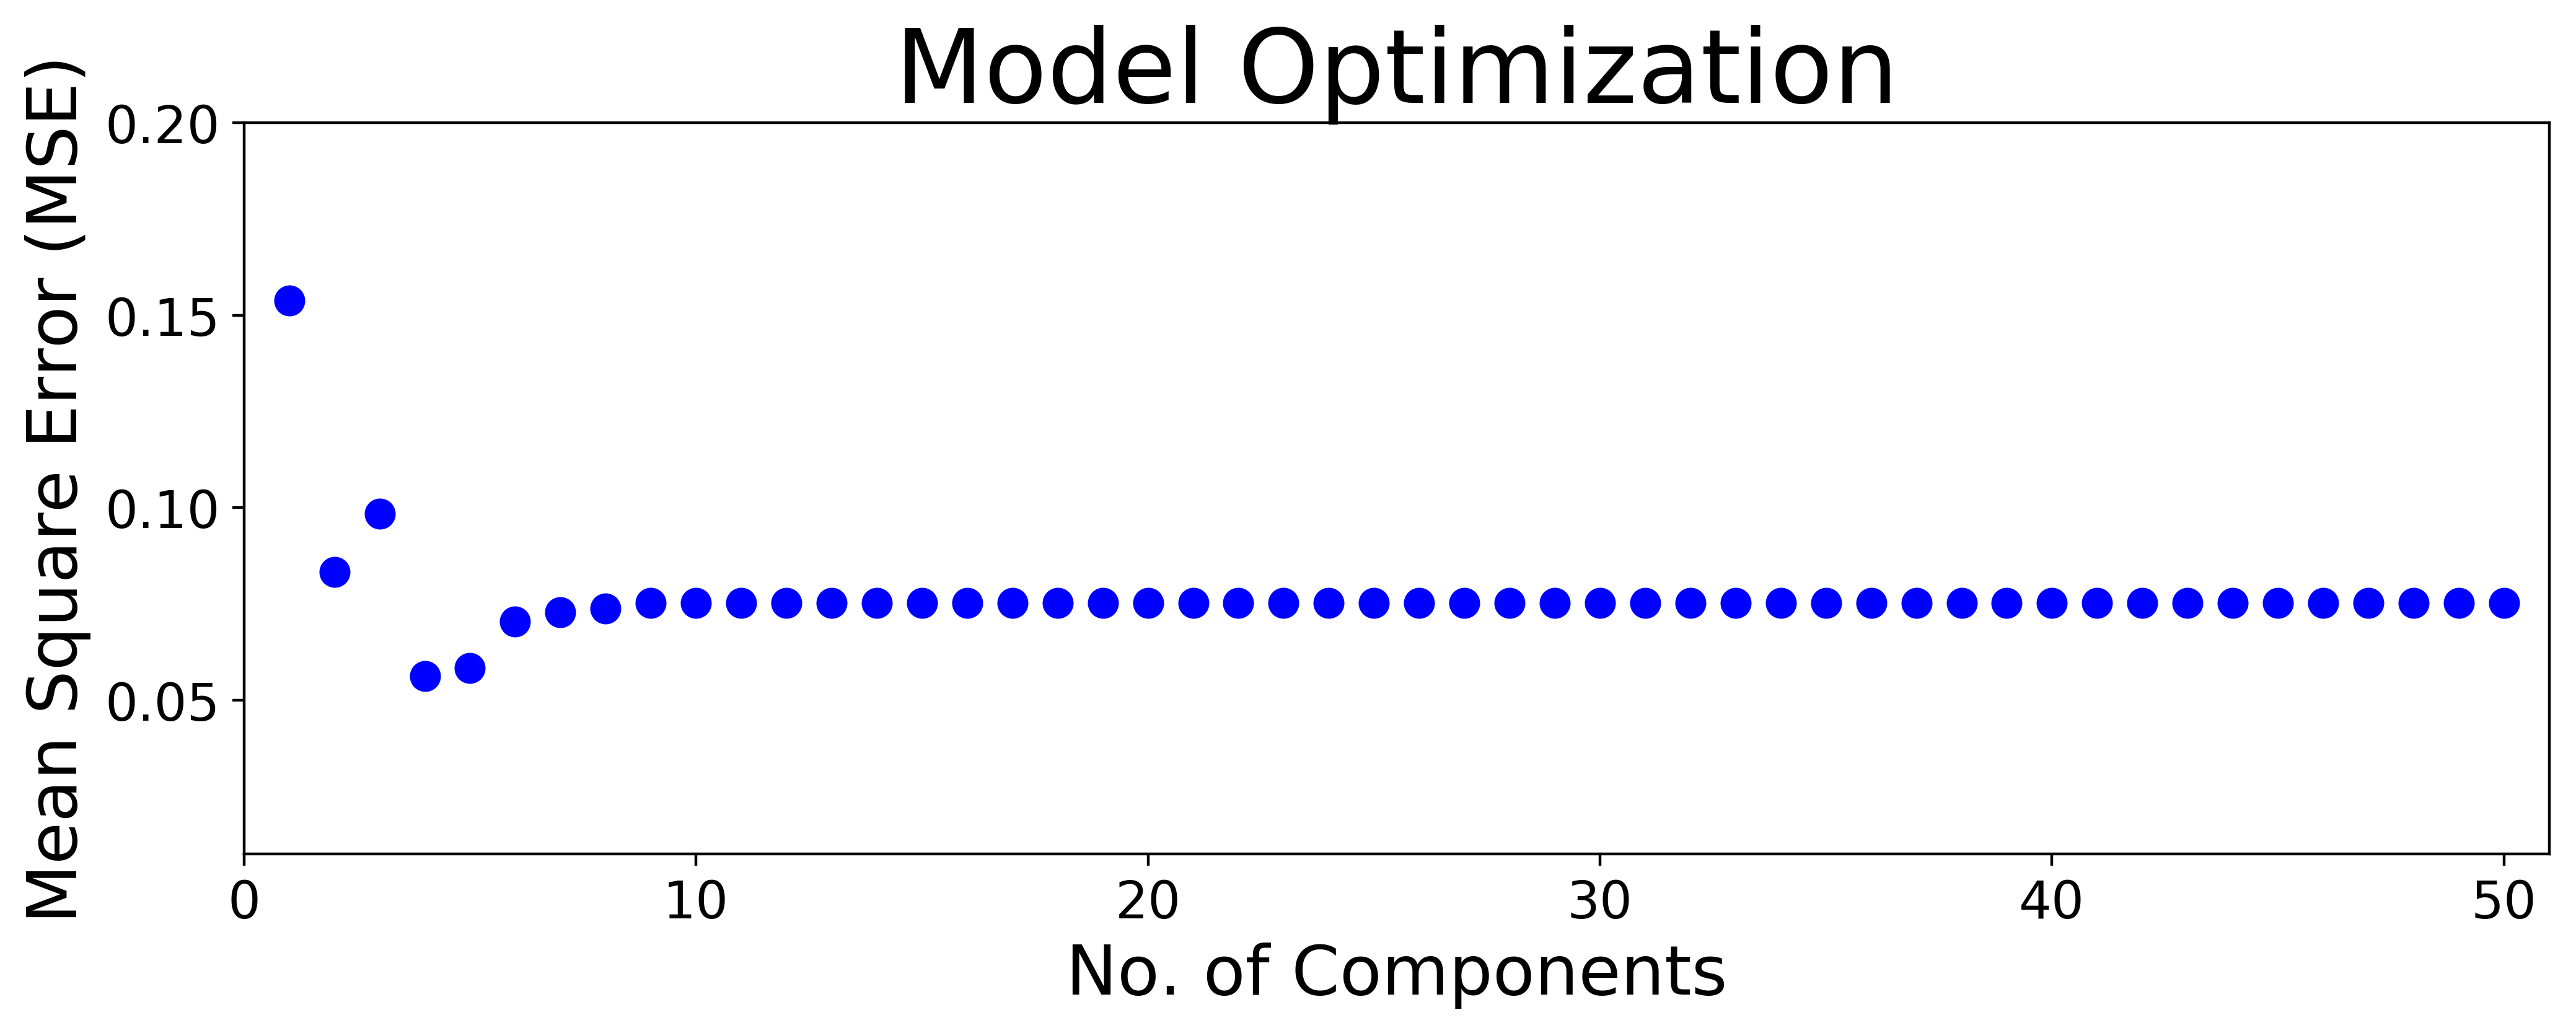

In [20]:
from sklearn.cross_decomposition import PLSRegression
MSE = []
max_no_components=50
no_components = [i for i in range(1,max_no_components+1)]
for c in no_components:
    result = []
    for i in range(0,m*n):
        drop_list = [i]    
        X_train = spectra.copy()
        X_train.drop(drop_list,axis = 0, inplace=True)
        y_train = df.copy()
        y_train.drop(drop_list,axis = 0, inplace=True)
        X_test = spectra.iloc[drop_list]
        y_test = df.iloc[drop_list]
        model = PLSRegression(c,max_iter=10000)
        model.fit(X_train,y_train)
        predicted_concentration = model.predict(X_test)
        result.append(predicted_concentration[0])
    MSE.append(mean_squared_error(result, conc_list))
    print('c = ', c, '& mean_squared_error=',mean_squared_error(result, conc_list))

# Plotting:
gridspec.GridSpec(9,2)
figure(num=None, figsize=(12, 9), dpi=400, facecolor='w', edgecolor='k')
plt.subplot2grid((9,2), (0,0),colspan=2, rowspan=4)
plt.xlabel('No. of Components',fontsize=20)
plt.ylabel('Mean Square Error (MSE)',fontsize=20)
plt.title('Model Optimization',fontsize=30)
plt.scatter(no_components, MSE, color='blue', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0.01,0.2)
plt.xlim(0,max_no_components+1)


predic_conc[ 1 ]= [0.011  0.1418]
predic_conc[ 2 ]= [0.0738 0.022  0.2106 0.0453 0.0307]
predic_conc[ 3 ]= [0.7815 0.1824 0.282  0.2894]
predic_conc[ 4 ]= [1.1481 0.2455 0.9327 1.2975 0.6088]
Actual Mass [0.1, 1, 10, 100]
Average Prediction [7.642, 7.649, 38.382, 84.655]
STDEV Prediction [9.25, 7.751, 26.956, 42.41]


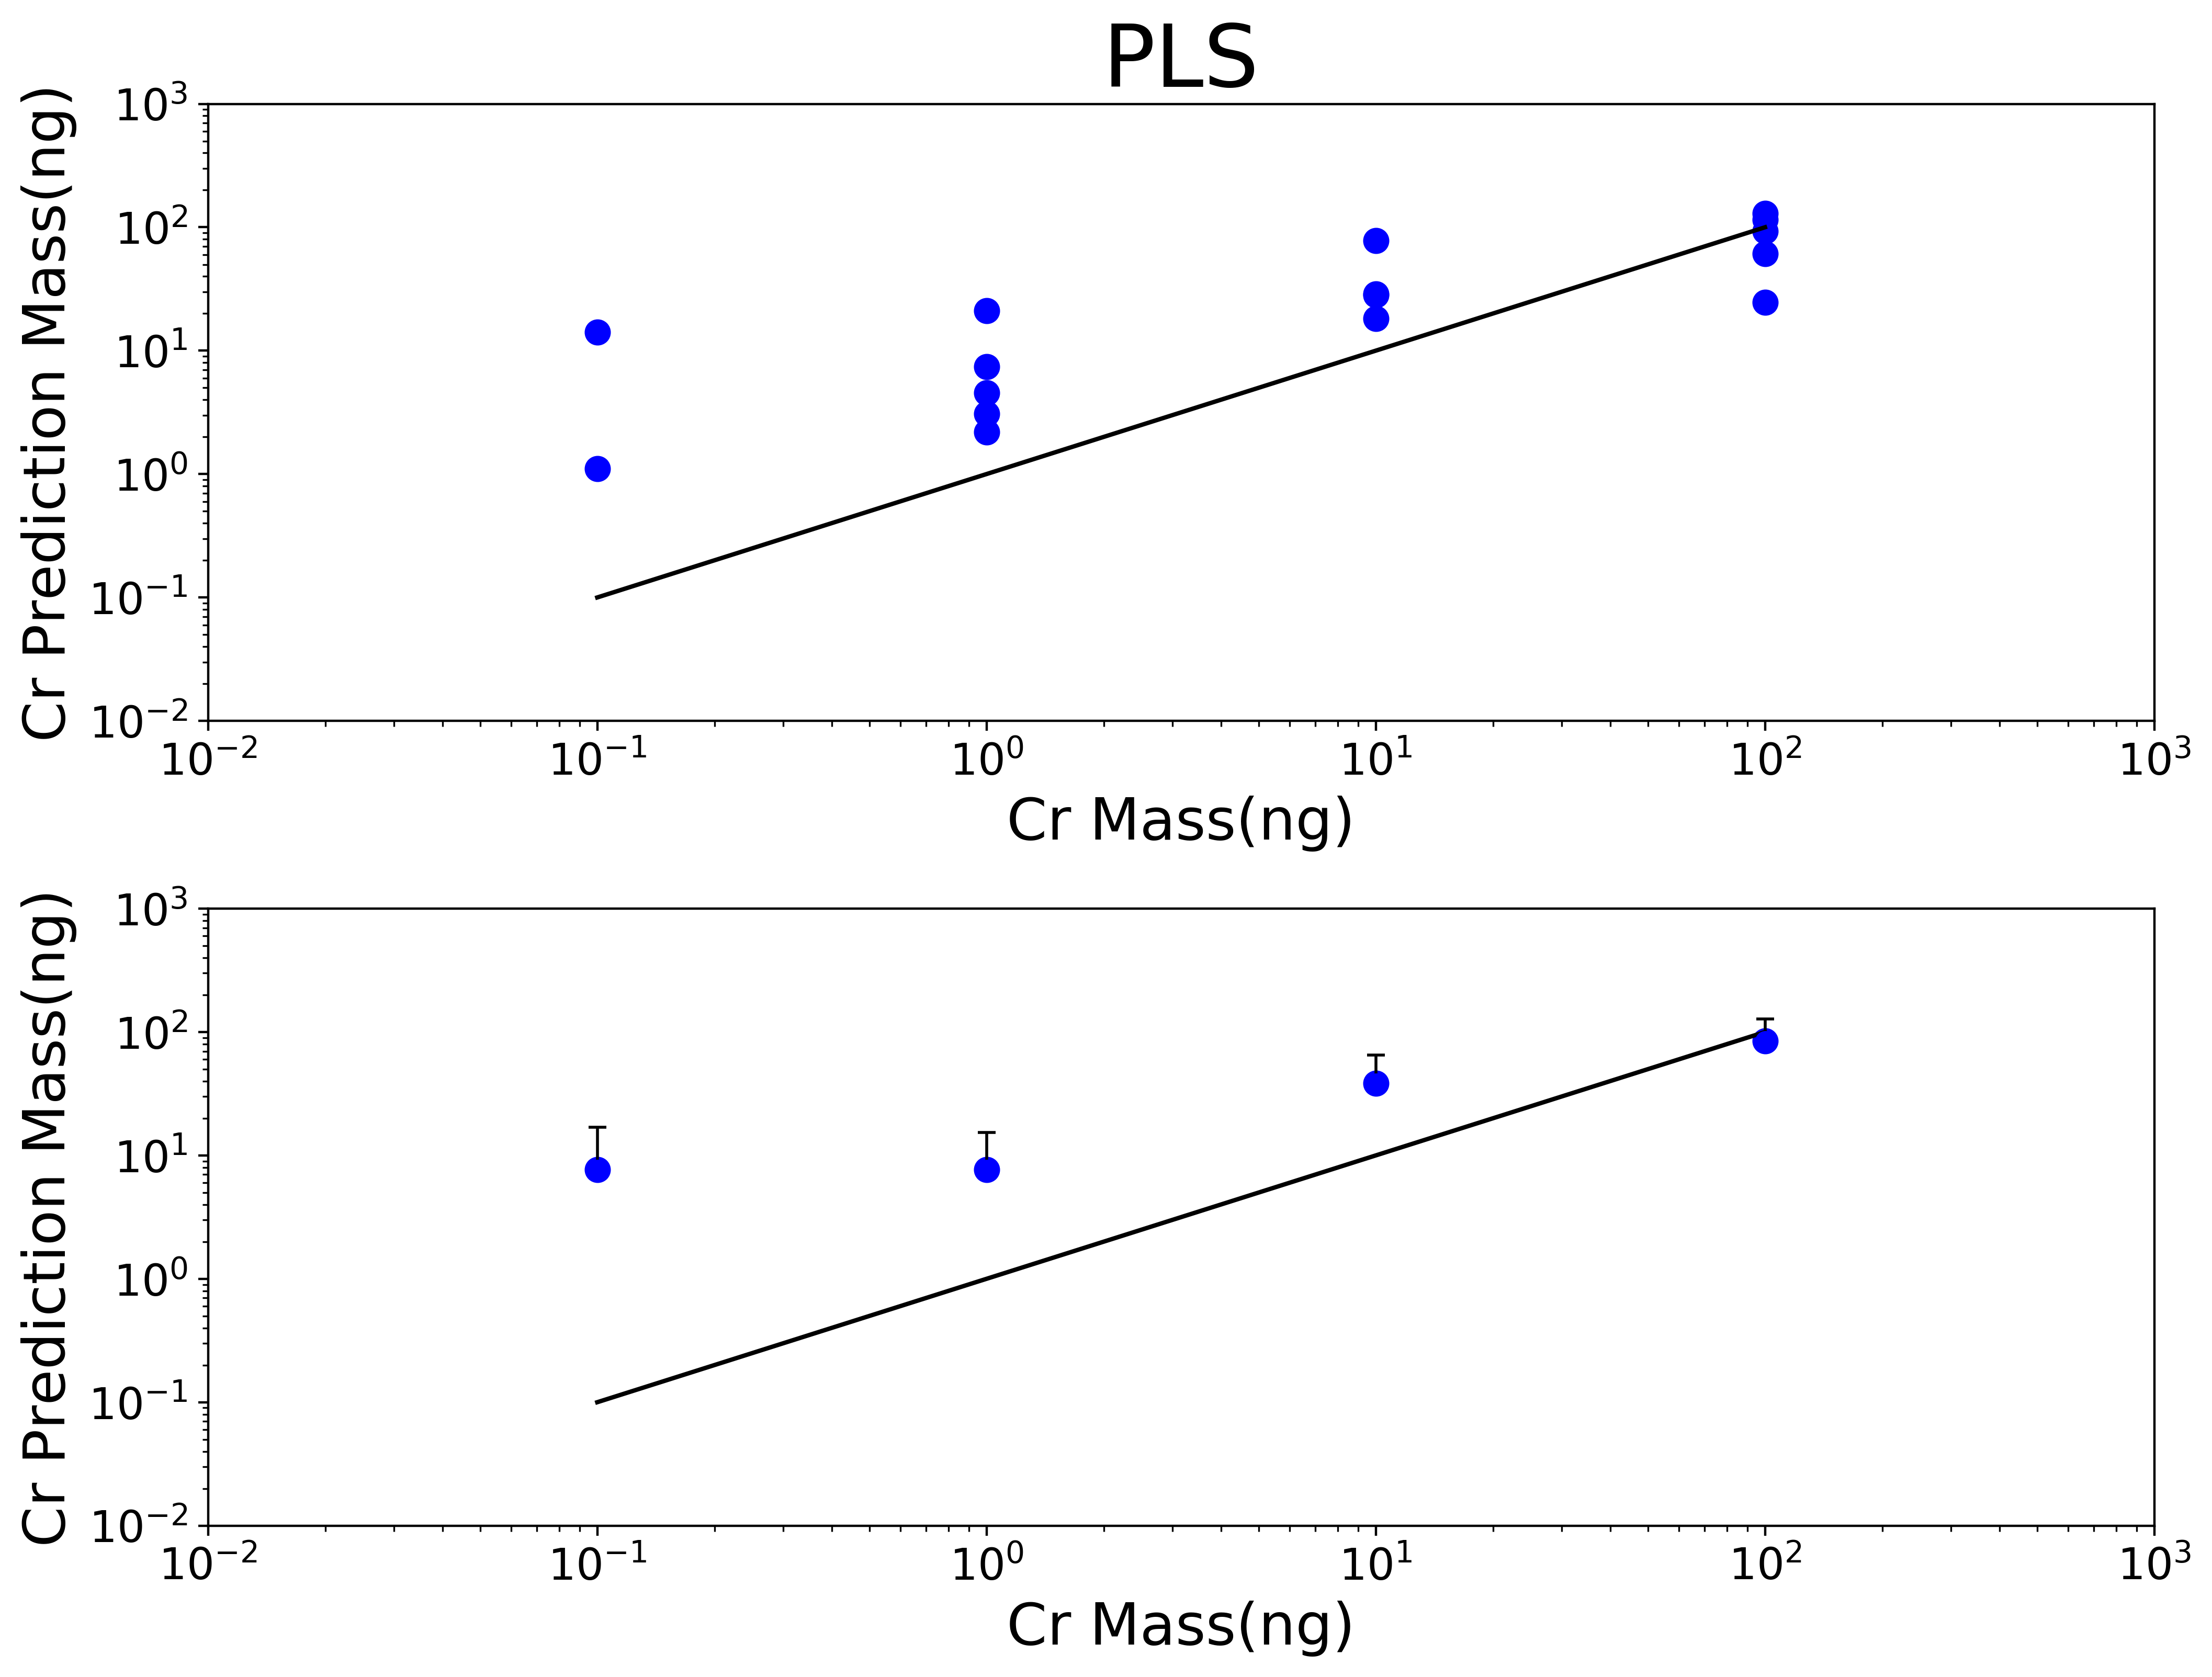

In [22]:
## PLS IMPLEMENTATION:
from sklearn.cross_decomposition import PLSRegression

my_cv = LeaveOneOut()
X = spectra.copy()
y = df.copy()
n_components=10
model = PLSRegression(n_components)
predictions = cross_val_predict(model, X, y, cv=my_cv)

# Extracting the predictions for each concentrtion into a separate list:
p = n+1
final = [predictions[i * p:(i + 1) * p] for i in range((len(predictions) + p - 1) // p )]  
predic_conc = [[]]
for i in range (0,m-1):
    x = np.array(final[i])
    x = x[x >=0]
    predic_conc.append(x)

for i in range (1,m):
    print('predic_conc[',i,']=',predic_conc[i])

# Calculating the average and STDEV for Non-Negative Values:
averages = []
std = []
for i in range (1,m):
    averages.append(statistics.mean(predic_conc[i]))
    if len(predic_conc[i])<2:
        std.append(1)
    else:
        std.append(statistics.stdev(predic_conc[i]))

# Converting from normalized results to actual results:
averages = [x * max_concentration for x in averages]
std = [x * max_concentration for x in std]

# Printing Results:
print('Actual Mass', concentration_org)
print_average =  [round(x,3) for x in averages] 
print('Average Prediction',print_average)
print_std =  [round(x,3) for x in std] 
print('STDEV Prediction', print_std)
    
# Plotting:
gridspec.GridSpec(9,2)
figure(num=None, figsize=(12, 9), dpi=400, facecolor='w', edgecolor='k')

# Plot No. 1:
plt.subplot2grid((9,2), (0,0),colspan=2, rowspan=4)
plt.xlabel('Cr Mass(ng)',fontsize=20)
plt.ylabel('Cr Prediction Mass(ng)',fontsize=20)
plt.title('PLS',fontsize=30)
plt.plot(concentration_org, concentration_org,  color='black')
plt.scatter(y*max_concentration, predictions*max_concentration, color='blue', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yscale('log') 
plt.xscale('log')
plt.ylim(min_concentration*0.1,max_concentration*10)
plt.xlim(min_concentration*0.1,max_concentration*10)

# Plot No. 2:
plt.subplot2grid((9,2), (5,0),colspan=2, rowspan=4)
plt.plot(concentration_org, concentration_org,  color='black')
plt.scatter(concentration_org, averages,color='blue', linewidth=3)
plt.xlabel('Cr Mass(ng)',fontsize=20)
plt.ylabel('Cr Prediction Mass(ng)',fontsize=20)
plotline, cap, barlinecols = plt.errorbar(concentration_org, averages, yerr=std, fmt='o', color='blue',
                                          ecolor='black', elinewidth=1,capsize=3,lolims=True)
cap[0].set_marker('_')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(min_concentration*0.1,max_concentration*10)
plt.xlim(min_concentration*0.1,max_concentration*10)
plt.xscale('log')
plt.yscale('log')
#fig.subplots_adjust(wspace=20)


LOD =  0.7475846031001526 ng


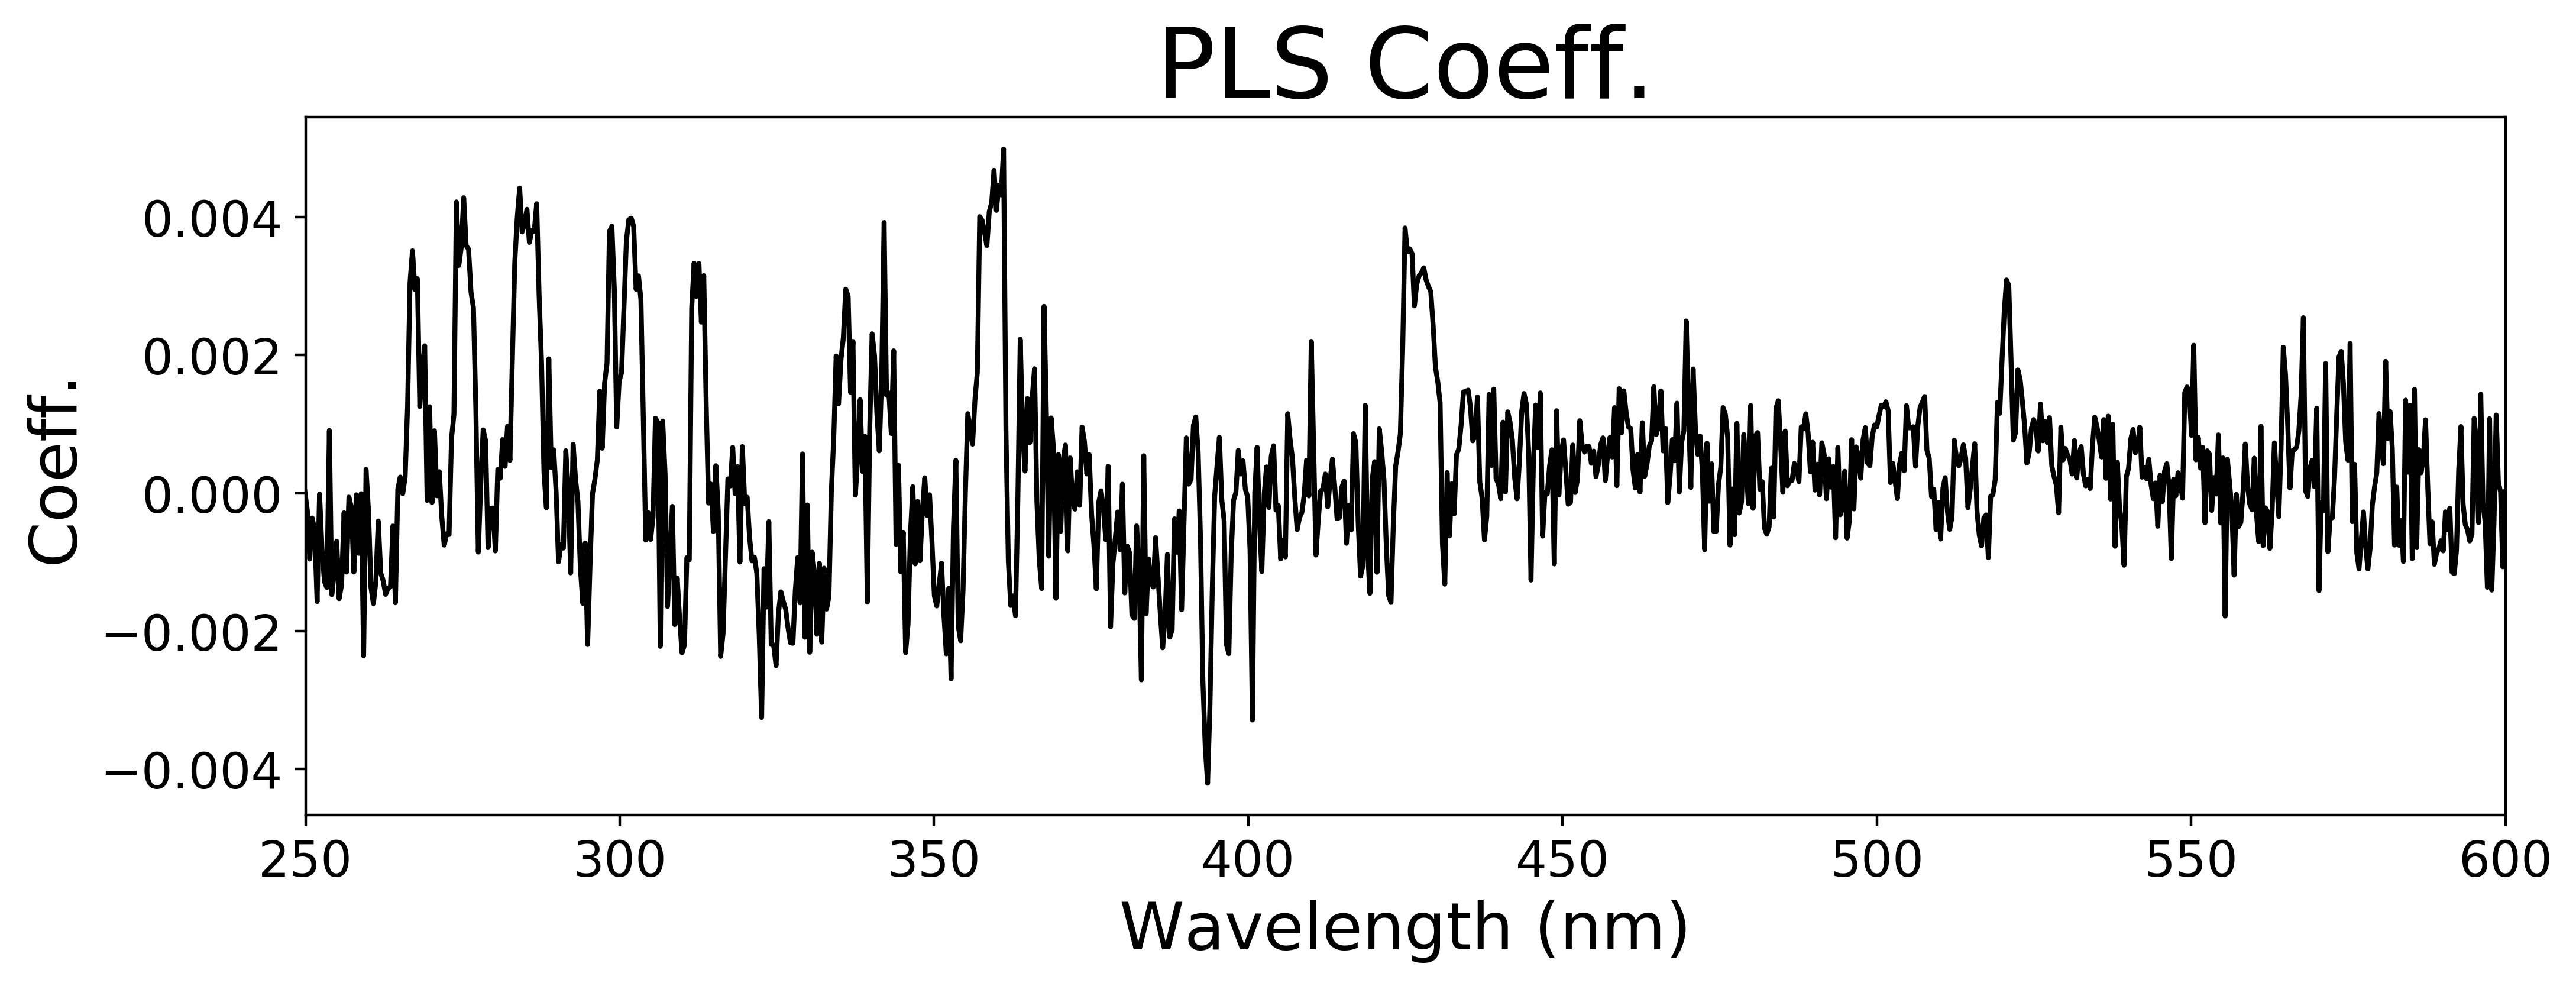

In [24]:
n_components=10
model = PLSRegression(n_components,max_iter=5000)
X = spectra.copy()
y = df.copy()
model.fit(X,y)
gridspec.GridSpec(9,2)
figure(num=None, figsize=(12, 9), dpi=400, facecolor='w', edgecolor='k')
plt.subplot2grid((9,2), (5,0),colspan=2, rowspan=4)
plt.plot(wavelength, model.coef_,  color='black')
plt.xlabel('Wavelength (nm)',fontsize=20)
plt.ylabel('Coeff.',fontsize=20)
plt.title('PLS Coeff.',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(250,600)
print('LOD = ',3*0.045869682*np.linalg.norm(model.coef_.T)*max_concentration, 'ng')
#fig.subplots_adjust(wspace=20)